# What is the direct cause to death from Heart Failure?

## Can we find it through Data Aanalysis?


**For this analysis, I am going to use "Heart Failure Prediction" data from this source**

*source : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data*

False means the patient does not have the symptom or condition.

Positive means the patient does have the symptom or condition.

***Columns***
1. Age - Patient's age
2. Anaemia - Patient's anaemia status (0: False, 1: Positive)
3. creatinine_phosphokinase
4. diabetes - (0: False, 1: Positive)
5. ejection_fraction - in %
6. high_blood_pressure - (0: False, 1: Positive)
7. platelets - the level of platelets in kiloplatelets/ml
8. serum_creatinine - the level of creatinine in mg/dl
9. serum_sodium - the level of sodium in mEq/L
10. sex - (0: Female, 1: Male)
11. smoking - (0: No, 1: Yes)
12. time - Observation time period
13. Death_event - (0: Survived, 1: deceased)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# reading the dataset
bring_data = os.path.join(r'C:\Users\andre\Desktop\Time_Series_Data\Data_Analysis', 'heart_failure_clinical_records_dataset.csv')

df = pd.read_csv(bring_data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Always look into the dataset and its columns first

print("The shape of the DataFrame : {}".format(df.shape))
# There are 13 columns and 299 rows

print("The dimension of the DataFrame : {}".format(df.ndim))


The shape of the DataFrame : (299, 13)
The dimension of the DataFrame : 2


In [4]:
# check if there is any missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
"""
There are 299 'non-null' values, therefore this dataset is clean

3 float data types and 10 integer data types, must consider which datatype is a 'categorical'
ex) DEATH_EVENT, smoking, sex, anaemia, diabetes, high_blood_pressure

"""
None


In [6]:
# look for Balanced and Imbalanced data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
"""
Data values that have a minimum of 0 and maximum of 1 indicate that they are categorical. 
However, if the standard deviation (std) is far from the mean value, 
it may indicate that the data is imbalanced towards either 0 or 1. 
For instance, Sex has a mean value of approximately 0.32 but its std is approximately 0.1466 higher, 
indicating that there are more male patients recorded in this data.

So far, just by looking at the numbers, categorical datasets do not show great imbalance. 
However, other datasets such as 'platelets' and 'serum_sodium' exhibit significant imbalance. 
It is difficult to imagine how many datasets are far from the mean value, but we can visualize these outliers.

"""
None

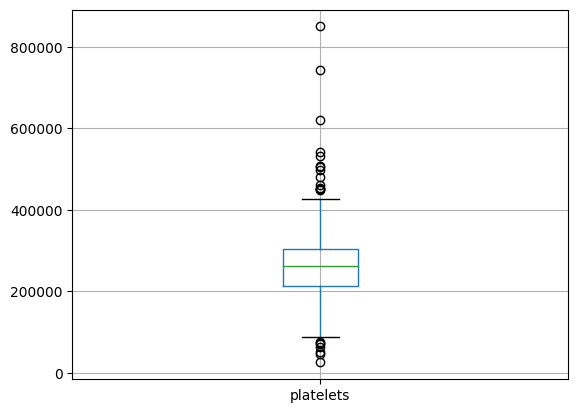

In [8]:
# Visualizing Outliers

# using the boxplot from Matplotlib to visualize Outliers in "platelets"
df.boxplot(column=["platelets"])
plt.show()

In [9]:
"""
There are imbalanced datasets with respect to high levels of platelets.

In some cases, such imbalanced datasets may lead to incorrect results, 
and thus they may need to be removed before analyzing the data. 
Alternatively, the datasets could be used by converting the values to logarithmic scales.

However, for this analysis, the outliers will not be removed because even high levels of platelets 
among recorded patients could be meaningful.


"""
None

## Relationship between the patient's age and death_event

In [10]:
# Create Age_range dataset to narrow down the age group. 
age_range = 10
df['age_range'] = (df['age'] // age_range) * age_range
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_range
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60.0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50.0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,60.0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,50.0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,40.0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,40.0


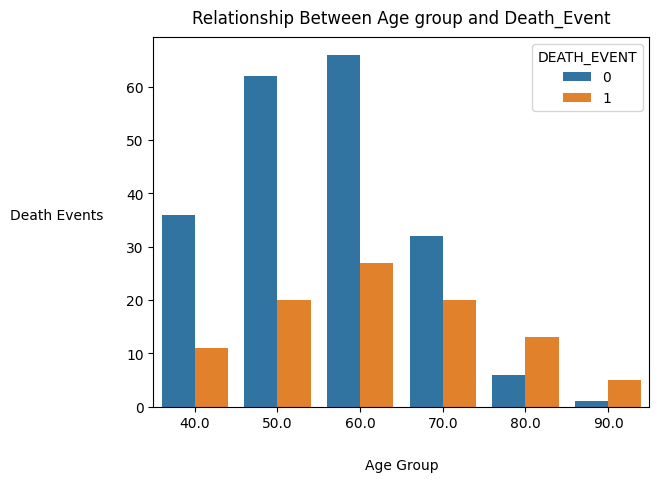

In [11]:
sns.countplot(data=df, x='age_range', hue='DEATH_EVENT')
plt.title("Relationship Between Age group and Death_Event", pad=10)
plt.xlabel("Age Group", labelpad=20)
plt.ylabel("Death Events", labelpad=50, rotation=0)
plt.show()


### <span style="color:red;">Conclusion</span>

***As we can see from the count plot above, the number of surviving patients is significantly reduced among those in their 70s, and the number of deaths outnumber the number of survivors among those over the age of 80. Thus, it is safe to say that age plays a role in determining the survival rate from heart failure. However, this does not answer what causes heart failure.***


## Relationship between 'creatinine_phosphokinase' and 'DEATH_EVENT'

In [12]:
# But before analyzing the realtionship between these two, We must understand what creatinine_phosphokinase is 
# If we do not understand what we are dealing with. 
# Simply by looking at numbers do not tell us anything. 


### What is 'creatinine_phosphokinase'?
Creatine phosphokinase (CPK), also known as creatine kinase (CK), is an enzyme found in muscle cells and certain other tissues in the body. It plays an important role in energy metabolism, specifically in the conversion of creatine to phosphocreatine, which is used as an energy source in muscle cells.

When muscle tissue is damaged or injured, CPK is released into the bloodstream, leading to an increase in the level of CPK in the blood. Therefore, measuring the level of CPK in the blood can be used as a marker of muscle damage, such as in the case of a heart attack or muscle injury.

There are three types of CPK isoenzymes: CPK-MB, which is primarily found in heart muscle; CPK-MM, which is found in skeletal muscle; and CPK-BB, which is found in brain tissue. By measuring the levels of different CPK isoenzymes, doctors can help to diagnose specific types of muscle damage or injury.

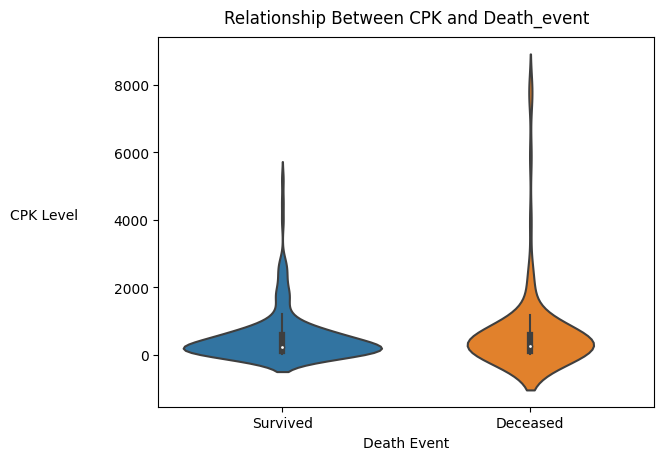

In [13]:
# Using Violin plot to analyze the relationship between the continous dataset and categorical dataset. 
sns.violinplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title("Relationship Between CPK and Death_event", pad=10)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("CPK Level", rotation=0, labelpad=50)
plt.show()

### <span style="color:red;">Conclusion</span>

***As we can see from the violin plot, most of the outliers we observed in CPK levels are concentrated among deceased patients and the majority of surviving patients have low level of CPK. This suggests that higher CPK levels may associate with an increased risk of death from heart failure***



## Relationship between 'Ejection_fraction' and 'Death_event'


### What is Ejection Fraction?

Ejection fraction (EF) is a measure of the percentage of blood that is pumped out of the heart with each heartbeat. Specifically, it is the fraction of blood that is ejected out of the left ventricle of the heart during systole (the contraction phase) compared to the total volume of blood in the ventricle at the end of diastole (the relaxation phase).

A normal ejection fraction is typically between 50-70%, which means that the heart is effectively pumping out more than half of the blood that it receives during each heartbeat. However, in some cases, the ejection fraction can be lower than normal, indicating that the heart is not pumping blood effectively.

In the context of heart failure, a low ejection fraction is often a sign of a weakened heart muscle, which can result in the heart being unable to pump enough blood to meet the body's needs. This can cause symptoms such as fatigue, shortness of breath, and fluid buildup in the lungs and other tissues. The degree of heart failure can be classified based on the ejection fraction value: heart failure with reduced ejection fraction (HFrEF) is defined as an EF of less than 40%, while heart failure with preserved ejection fraction (HFpEF) is defined as an EF of 50% or higher.


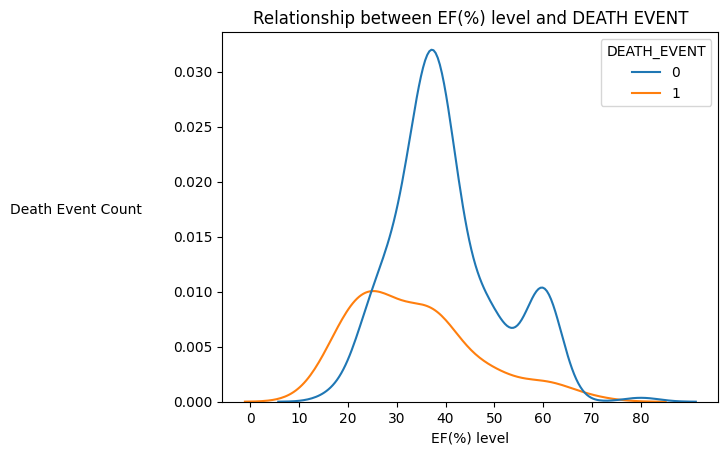

In [14]:
# Using KDE plot to see how ER level is affecting the DEATH EVENT
sns.kdeplot(data=df, x='ejection_fraction', hue='DEATH_EVENT')

# setting the x-axis tick marks by 10s.
plt.xticks(range(0, 81, 10))

plt.title("Relationship between EF(%) level and DEATH EVENT")
plt.xlabel("EF(%) level")
plt.ylabel("Death Event Count", rotation=0, labelpad=70)
plt.show()

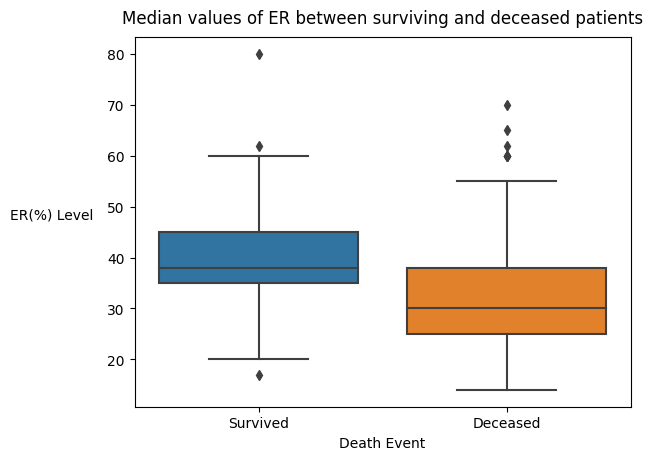

In [15]:
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df)

plt.title("Median values of ER between surviving and deceased patients", pad=10)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("ER(%) Level", rotation=0, labelpad=40)

plt.show()

### <span style="color:red;">Conclusion</span>

***By looking at the KDE plot above, as we learned about the ejection fraction, the majority of deceased patients had heart failure with reduced ejection fraction (HFrEF) which is less than 40%. However, we can also see that the majority of surviving patients had ER levels between the mid 20s to mid 40s, which is still lower than the 50-70% typically considered normal. If the lower level of ER is truly the catalyst leading to death from heart failure, then we should see the majority of surviving patients' ER levels shift to the right and the deceased patients' ER levels shift to the left, to show a clear contrast between the two.***

***Thus, it doesn't seem like there is a big difference, but when we look at the data using a box plot, we can see that the median value of ER among deceased patients clearly shifts down below the median and interquartile value of surviving patients.***

## Relationship between 'platelets' and 'Death_event'

### What is Platelets?

Platelets are tiny blood cells that play an important role in the blood clotting process. They are formed in the bone marrow and circulate in the blood, where they can quickly clump together to form a clot in response to an injury or damage to a blood vessel. This helps to prevent excessive bleeding and promotes wound healing.

In the context of heart failure, platelets can be involved in a number of different ways. For example, heart failure patients may have an increased risk of blood clots forming in their blood vessels, which can lead to serious complications such as stroke, heart attack, or pulmonary embolism. Platelets can also become activated and contribute to inflammation in the blood vessels, which can further contribute to the progression of heart failure.

In some cases, heart failure patients may be treated with medications that affect platelet function, such as aspirin or other antiplatelet drugs. These drugs can help to reduce the risk of blood clots forming and can also have other beneficial effects on the cardiovascular system. However, the use of these drugs must be carefully monitored and balanced with the risks of bleeding, as excessive use of antiplatelet medications can increase the risk of bleeding complications.

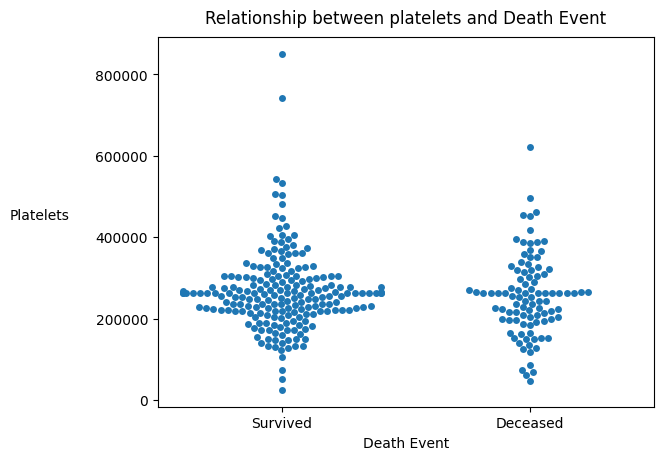

In [16]:
sns.swarmplot(data=df, x="DEATH_EVENT", y="platelets")

plt.title("Relationship between platelets and Death Event", pad=10)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("Platelets", rotation=0, labelpad=40)
plt.show()

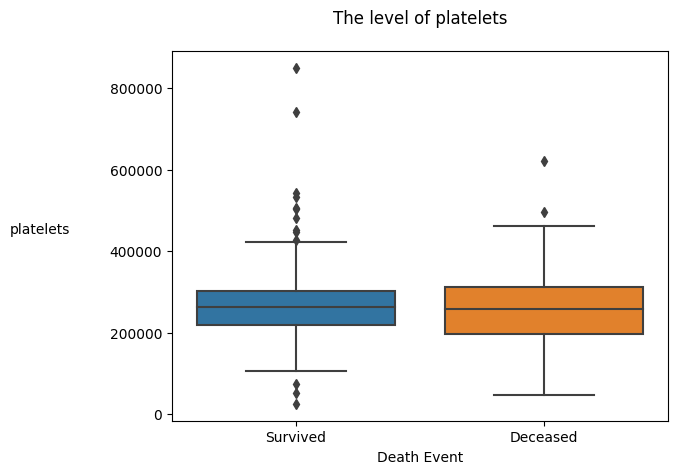

In [17]:
sns.boxplot(data=df, x="DEATH_EVENT", y="platelets")

plt.title("The level of platelets", pad=20)
plt.ylabel("platelets", rotation=0, labelpad=50)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.show()

### <span style="color:red;">Conclusion</span>

***By looking at the swarm plot, we can see that the outlier came from surviving patients. Despite the existence of outliers, the majority of surviving patients had lower levels of platelets than deceased patients. However, the swarm plot does not provide us with a clear picture. By using a box plot, we still cannot see a clear difference between surviving and deceased patients. Although the interquartile range of deceased patients is larger than that of surviving patients, the median value is within a similar range. Therefore, the level of platelets is uncertain factor to heart failure.***

## Relationship between 'Serum_creatinine' and 'Death event'

### What is 'Serum Creatinine'?

Serum creatinine is a blood test that measures the level of creatinine in the blood. Creatinine is a waste product that is produced by the muscles as they break down and is removed from the body through the kidneys. When the kidneys are functioning normally, they are able to filter creatinine from the blood and excrete it in the urine. However, when the kidneys are not working properly, the level of creatinine in the blood can increase.

In the context of heart failure, serum creatinine levels can be used as a marker of kidney function. Heart failure can cause decreased blood flow to the kidneys, which can lead to a decrease in kidney function. As a result, the level of creatinine in the blood may increase. Elevated levels of serum creatinine can indicate that the kidneys are not working as well as they should be, which can be a sign of worsening heart failure.

In addition, some medications that are used to treat heart failure can be harmful to the kidneys and can cause an increase in serum creatinine levels. For this reason, monitoring of serum creatinine levels is important in heart failure patients to ensure that medications are being used safely and to detect any changes in kidney function that may require adjustment of treatment.

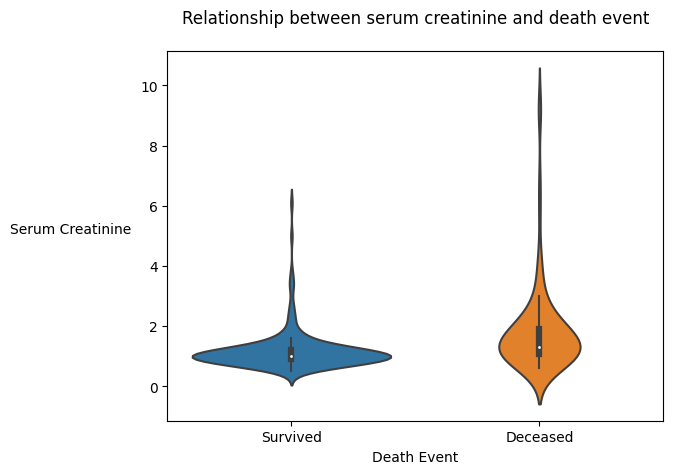

In [18]:
sns.violinplot(data=df, x="DEATH_EVENT", y="serum_creatinine")

plt.title("Relationship between serum creatinine and death event", pad=20)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("Serum Creatinine", rotation=0, labelpad=50)
plt.show()

### <span style="color:red;">Conclusion</span>

***Serum creatinine shares a similar pattern to the CPK level observed above, with outliers concentrated among deceased patients. Elevated levels of serum creatinine are caused by decreased kidney function, which can be a symptom of severe heart failure. While it is not the direct cause of heart failure, it raises the risk of dying from heart failure and may require monitoring.***

## Relationship between 'Serum_sodium' and 'Death event'

### What is 'Serum sodium'?

Serum sodium is a blood test that measures the level of sodium in the blood. Sodium is an important electrolyte that helps to regulate the balance of fluids in the body and is essential for many bodily functions, including nerve and muscle function.

In the context of heart failure, serum sodium levels can be used as a marker of fluid balance. Heart failure can cause a buildup of fluid in the body, which can lead to a decrease in the level of sodium in the blood. This can be a sign of worsening heart failure and can be an indicator of poor prognosis. This is because a decrease in serum sodium levels can indicate that the body is retaining too much fluid, which can lead to further complications such as swelling, shortness of breath, and edema.

In addition, some medications that are used to treat heart failure, such as diuretics, can affect serum sodium levels. Diuretics help to remove excess fluid from the body, but they can also cause an excessive loss of sodium and other electrolytes. Therefore, monitoring of serum sodium levels is important in heart failure patients to ensure that they are maintaining a proper fluid balance and that medications are being used safely and effectively.



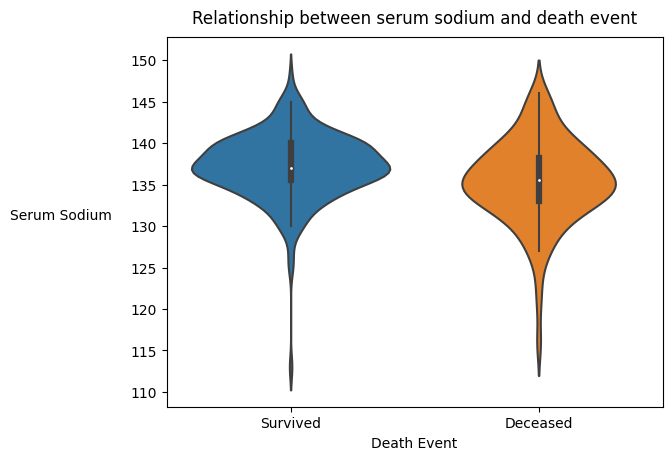

In [19]:
sns.violinplot(data=df, x="DEATH_EVENT", y="serum_sodium")

plt.title("Relationship between serum sodium and death event", pad=10)
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("Serum Sodium", rotation=0, labelpad=50)

plt.show()

In [20]:
# Since serum sodium does not contain outliers, it is hard to tell the difference by using violin plot
# so, lets use boxplot

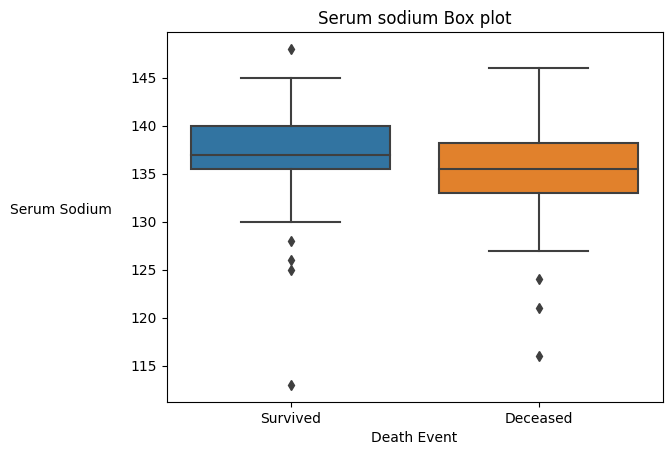

In [21]:
sns.boxplot(data=df, x="DEATH_EVENT", y="serum_sodium")

plt.title("Serum sodium Box plot")
plt.xlabel("Death Event")
plt.xticks([0, 1], ["Survived", "Deceased"])
plt.ylabel("Serum Sodium", rotation=0, labelpad=50)
plt.show()

### <span style="color:red;">Conclusion</span>

***Similar to the CPK and serum creatinine levels, serum sodium is not the direct cause of heart failure but it is a result of it. We can see that the interquartile range of serum sodium between surviving and deceased patients does not have a significant gap, but the median value of deceased patients is lower than that of surviving patients. A lower level of serum sodium is a risk factor for developing severe heart failure, so it needs to be closely monitored.***

# Comparing categorical datasets

There are six categorical datasets, all consisting of binary values (0, 1). With the exception of sex and DEATH_EVENT, all datasets are related to medical conditions. We will examine how each of these datasets correlates with DEATH_EVENT

In [22]:
# six datasets to look up
# anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT

## Anaemia and Death Event

### What is Anaemia? 

Anemia is a condition in which the body doesn't have enough red blood cells, which can lead to a decrease in the amount of oxygen that is carried to the body's tissues. Red blood cells contain hemoglobin, which is a protein that binds to oxygen and helps to transport it throughout the body.

In the context of heart failure, anemia can be a common complication. Heart failure can cause a decrease in the amount of oxygen that is delivered to the body's tissues, which can lead to a decrease in the production of red blood cells. In addition, some of the medications that are used to treat heart failure, such as ACE inhibitors and angiotensin receptor blockers, can cause a decrease in the production of red blood cells. As a result, anemia is a common finding in patients with heart failure.

Anemia can further exacerbate the symptoms of heart failure, as the body's tissues are not receiving enough oxygen. This can cause symptoms such as fatigue, weakness, shortness of breath, and exercise intolerance. Anemia can also be associated with a higher risk of hospitalization and mortality in heart failure patients. Therefore, it is important to monitor for anemia in heart failure patients and to provide appropriate treatment if it is identified. This may include medications to boost red blood cell production, blood transfusions, or other therapies as appropriate.

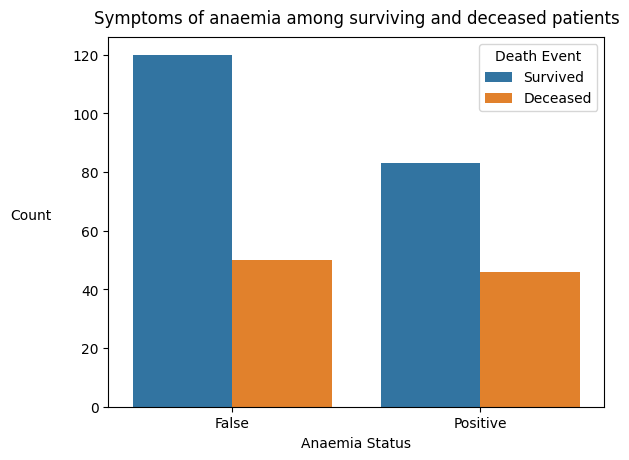

In [23]:
sns.countplot(data=df, x="anaemia", hue="DEATH_EVENT")
plt.legend(title="Death Event", loc="upper right", labels=["Survived", "Deceased"])

plt.title("Symptoms of anaemia among surviving and deceased patients", pad=10)
plt.xticks([0, 1], ["False", "Positive"])
plt.xlabel("Anaemia Status")
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

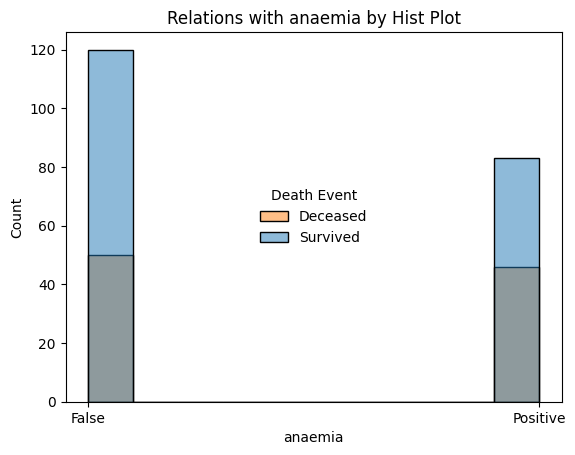

In [24]:
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT")

plt.title("Relations with anaemia by Hist Plot")
plt.legend(title="Death Event", loc="center", labels=["Deceased", "Survived"], frameon=False)
plt.xticks(range(0,2,1), ['False', 'Positive'])

plt.show()

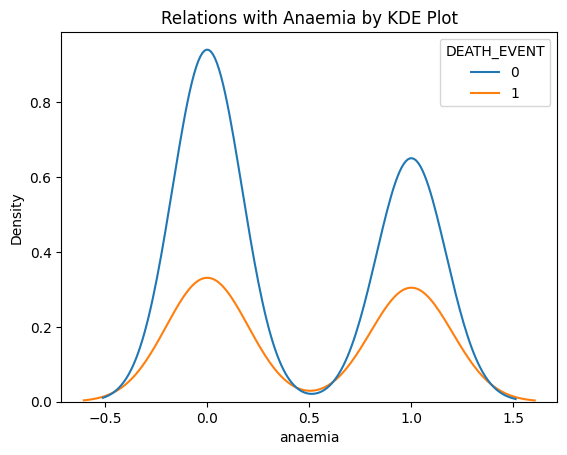

In [25]:
sns.kdeplot(data=df, x="anaemia", hue="DEATH_EVENT")

plt.title("Relations with Anaemia by KDE Plot")
plt.show()

### <span style="color:red;">Conclusion</span>

***The number of surviving patients with anaemia was reduced, but there was no apparent difference in anaemia between deceased patients. All three different plots indicate that anaemia is not a major factor contributing to severe heart failure.***

## Diabetes and DEATH_EVENT

### What is Diabetes?

Diabetes is a chronic medical condition in which the body is unable to properly regulate the levels of glucose (sugar) in the blood. There are two main types of diabetes: type 1 diabetes, which is an autoimmune disorder that usually develops in childhood, and type 2 diabetes, which typically develops in adulthood and is associated with obesity and lifestyle factors.

In the context of heart failure, diabetes is a common comorbidity. Diabetes can contribute to the development and progression of heart failure in a number of ways. High levels of glucose in the blood can cause damage to the blood vessels and nerves, which can contribute to the development of atherosclerosis (narrowing of the arteries) and peripheral vascular disease. This can lead to decreased blood flow to the heart, which can cause or exacerbate heart failure.

In addition, diabetes can cause damage to the heart muscle itself, which can lead to a decrease in the heart's pumping ability and contribute to heart failure. Diabetes is also associated with an increased risk of hypertension (high blood pressure), which is a common risk factor for heart failure.

Heart failure patients with diabetes may require specialized treatment to manage both conditions. This may include medications to control glucose levels, as well as medications to manage heart failure symptoms and prevent complications such as blood clots and fluid retention. Patients with diabetes and heart failure should also receive regular monitoring to ensure that their blood pressure, glucose, and other risk factors are well controlled.

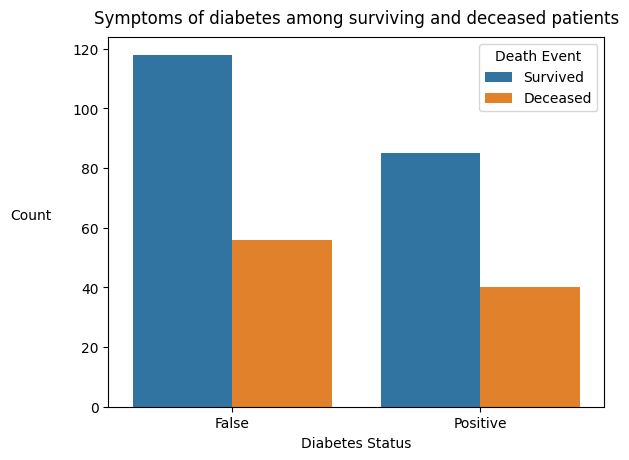

In [26]:
sns.countplot(data=df, x="diabetes", hue="DEATH_EVENT")
plt.legend(title="Death Event", loc="upper right", labels=["Survived", "Deceased"])

plt.title("Symptoms of diabetes among surviving and deceased patients", pad=10)
plt.xticks([0, 1], ["False", "Positive"])
plt.xlabel("Diabetes Status")
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

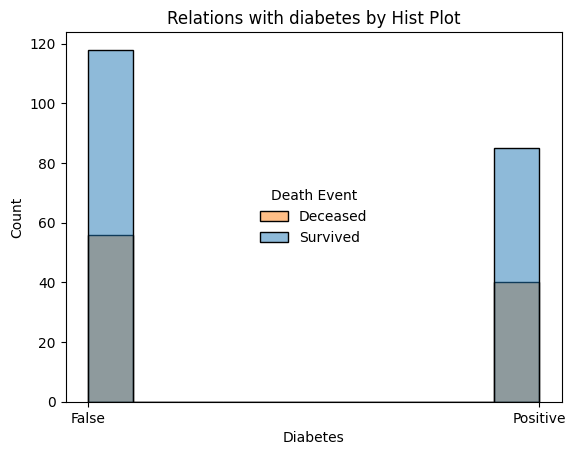

In [27]:
sns.histplot(data=df, x="diabetes", hue="DEATH_EVENT")

plt.title("Relations with diabetes by Hist Plot")
plt.legend(title="Death Event", loc="center", labels=["Deceased", "Survived"], frameon=False)
plt.xticks(range(0,2,1), ['False', 'Positive'])
plt.xlabel("Diabetes")

plt.show()

### <span style="color:red;">Conclusion</span>

***Although the number of surviving patients who had diabetes was lower than those who didn't, the same phenomenon occurred among deceased patients as well. Therefore, I cannot conclude that having diabetes worsens heart failure and leads to death. If having diabetes does really contribute to the death of a patient with heart failure, then the number of deceased patients who had diabetes should be higher.***

## High blood pressure and DEATH_EVENT

### What is high blood pressure and what does it have to do with heart failure?

High blood pressure, also known as hypertension, is a medical condition in which the force of blood against the walls of the arteries is consistently too high. Blood pressure is measured in millimeters of mercury (mmHg) and is expressed as two numbers: systolic pressure (the top number), which represents the pressure in the arteries when the heart beats, and diastolic pressure (the bottom number), which represents the pressure in the arteries when the heart is at rest between beats.

In the context of heart failure, high blood pressure is a common risk factor and can contribute to the development and worsening of heart failure. High blood pressure can cause damage to the walls of the arteries, which can lead to the development of atherosclerosis (narrowing of the arteries) and peripheral vascular disease. This can lead to a decrease in blood flow to the heart, which can cause or exacerbate heart failure.

In addition, high blood pressure can cause the heart muscle to work harder to pump blood through the body. Over time, this increased workload can lead to hypertrophy (enlargement) of the heart muscle and a decrease in the heart's pumping ability, which can contribute to heart failure.

Management of high blood pressure is an important aspect of preventing and managing heart failure. This may include lifestyle changes such as weight loss, exercise, and a healthy diet, as well as medications to lower blood pressure such as diuretics, ACE inhibitors, beta blockers, and calcium channel blockers. Regular monitoring of blood pressure is also important to ensure that it is well-controlled and to detect any changes that may require adjustment of treatment.

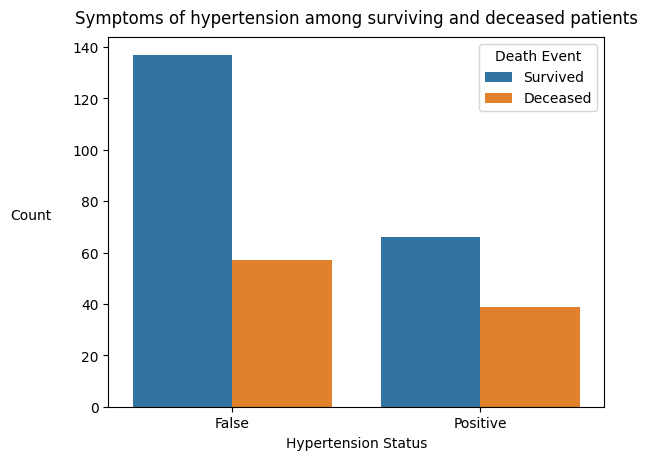

In [28]:
sns.countplot(data=df, x="high_blood_pressure", hue="DEATH_EVENT")
plt.legend(title="Death Event", loc="upper right", labels=["Survived", "Deceased"])

plt.title("Symptoms of hypertension among surviving and deceased patients", pad=10)
plt.xticks([0, 1], ["False", "Positive"])
plt.xlabel("Hypertension Status")
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

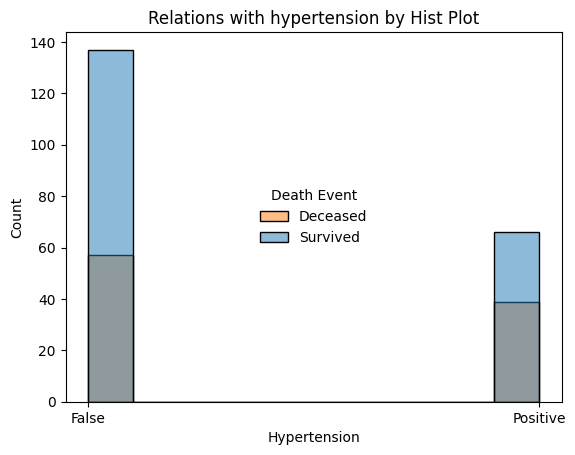

In [29]:
sns.histplot(data=df, x="high_blood_pressure", hue="DEATH_EVENT")

plt.title("Relations with hypertension by Hist Plot")
plt.legend(title="Death Event", loc="center", labels=["Deceased", "Survived"], frameon=False)
plt.xticks(range(0,2,1), ['False', 'Positive'])
plt.xlabel("Hypertension")

plt.show()

### <span style="color:red;">Conclusion</span>

***The pattern observed for hypertension is similar to that of diabetes and anaemia. However, the number of surviving patients with hypertension was greatly reduced, while the number of deceased patients with hypertension also reduced but not by a significant margin. Therefore, it could be said that having no symptoms of hypertension might increase the chances of survival from heart failure, but at the same time, it is not guaranteed that having symptoms of hypertension will worsen the heart failure and eventually lead to death.***

## Gender and DEATH_EVENT


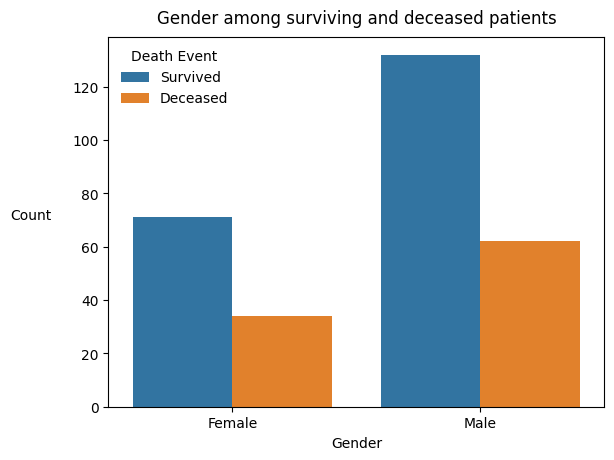

In [30]:
sns.countplot(data=df, x="sex", hue="DEATH_EVENT")
plt.legend(title="Death Event", loc="upper left", labels=["Survived", "Deceased"], frameon=False)

plt.title("Gender among surviving and deceased patients", pad=10)
plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

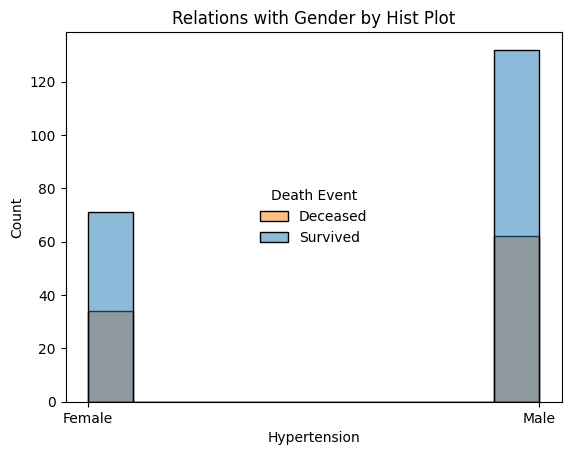

In [31]:
sns.histplot(data=df, x="sex", hue="DEATH_EVENT")

plt.title("Relations with Gender by Hist Plot")
plt.legend(title="Death Event", loc="center", labels=["Deceased", "Survived"], frameon=False)
plt.xticks(range(0,2,1), ['Female', 'Male'])
plt.xlabel("Hypertension")

plt.show()

### <span style="color:red;">Conclusion</span>

***The number of surviving and deceased patients was roughly similar between females and males, with both groups having a nearly two-fold increase in numbers. Therefore, it is not possible to conclude that a specific gender has a higher likelihood of dying from heart failure. This dataset does not appear to be significant in predicting the risk of heart failure based on gender.***

## Smoking and DEATH_EVENT

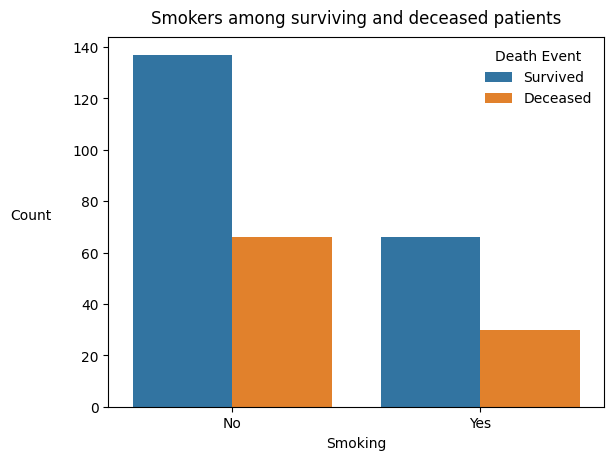

In [32]:
sns.countplot(data=df, x="smoking", hue="DEATH_EVENT")
plt.legend(title="Death Event", loc="upper right", labels=["Survived", "Deceased"], frameon=False)

plt.title("Smokers among surviving and deceased patients", pad=10)
plt.xticks([0, 1], ["No", "Yes"])
plt.xlabel("Smoking")
plt.ylabel("Count", rotation=0, labelpad=30)
plt.show()

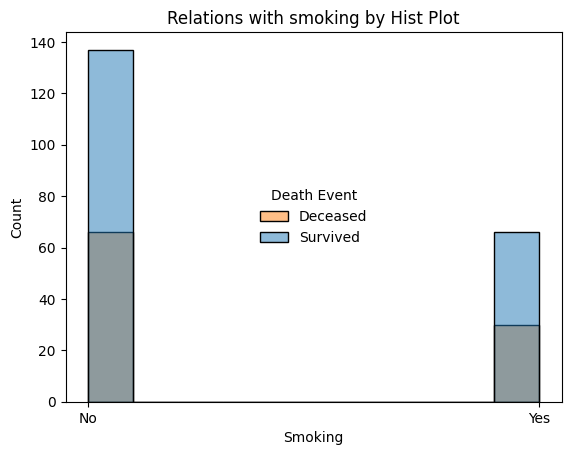

In [33]:
sns.histplot(data=df, x="smoking", hue="DEATH_EVENT")

plt.title("Relations with smoking by Hist Plot")
plt.legend(title="Death Event", loc="center", labels=["Deceased", "Survived"], frameon=False)
plt.xticks(range(0,2,1), ['No', 'Yes'])
plt.xlabel("Smoking")

plt.show()

***Just as gender did not seem to have an impact on the DEATH_EVENT, smoking does not appear to be a leading factor for the DEATH_EVENT either. However, since smoking is an optional factor that patients can choose, let's see if smoking has affected other symptoms rather than the DEATH_EVENT itself.***

In [34]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_range'],
      dtype='object')

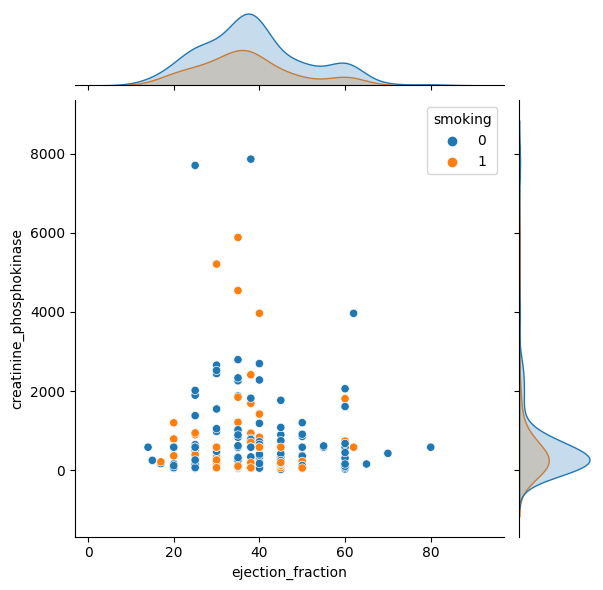

In [35]:
g = sns.jointplot(data=df, x="ejection_fraction", y="creatinine_phosphokinase", hue="smoking")
plt.show()

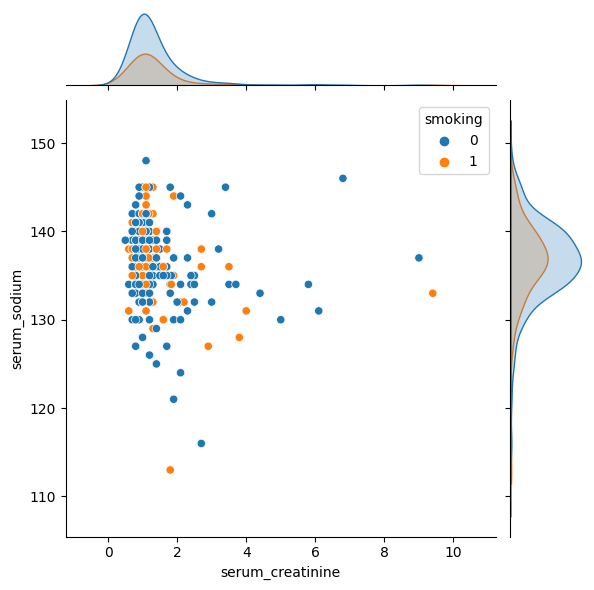

In [36]:
g = sns.jointplot(data=df, x="serum_creatinine", y="serum_sodium", hue="smoking")
plt.show()

### <span style="color:red;">Conclusion</span>

***I have chosen these four datasets - creatinine_phosphokinase, ejection_fraction, serum_sodium, and serum_creatinine - because they were the only ones that showed a clear indication that they were leading factors in death from heart failure. I was curious if smoking might have contributed to these factors as well.***

***However, comparing these factors to smoking showed no significant effect. While we generally think that smoking is inherently bad for people's health, the data shows that it may not be the case for all.***

# Machine Learning

What I have learned from the analysis above is that in order to reduce the risk of dying from heart failure, we need to monitor four factors: creatinine_phosphokinase, ejection_fraction, serum_sodium, and serum_creatinine, and maintain them at a normal level for each.

However, I still do not have the answer to which factor stands out as the major factor among all of these. It's difficult to determine just by looking at graphs. Therefore, I am going to use machine learning to analyze the data and identify the priorities among these factors.

In [37]:
# importing libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [38]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_range
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60.0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50.0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60.0


In [39]:
# Preprocessing the data before training the model

from sklearn.preprocessing import StandardScaler

# Separate the data into numerical datasets and categorical datasets. 

X_numerical = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

X_categorical = df[[ 'anaemia',  'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

y = df['DEATH_EVENT']

In [40]:
# Check new dataframes
X_numerical.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


In [41]:
X_categorical.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [42]:
y.reset_index().drop('index', axis=1)

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [43]:
# Preprocessing numerical datasets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)


In [44]:
X_scaled

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00,
         4.90208200e+00, -5.75030855e-01,  3.12043840e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03,
        -1.26338936e+00,  5.92615005e-03,  7.66063830e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01,
         1.34823057e+00,  1.99578485e-01, -1.41976151e-01]])

In [45]:
# Combining the scaled datasets with original datasets
X_scaled = pd.DataFrame(data=X_scaled, index=X_numerical.index, columns=X_numerical.columns)


In [46]:
X_scaled

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176
...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064


In [47]:
# Combine scaled datasets and categorical datasets
X = pd.concat([X_scaled, X_categorical], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


In [48]:
# Separating Trained Data and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1,0,1,1,0


In [49]:
# Balance the class distribution using oversampling

ROS = RandomOverSampler(random_state=1)
X_train, y_train = ROS.fit_resample(X_train, y_train)

In [50]:
# Preprocessing categorical datasets

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

## Evaluating the results

### Will use four different classifiers to find the best result. 

In [51]:
# Hyperparameter tuning using GridSearchCV

param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

RFC = RandomForestClassifier(random_state=1)

# CV=5 : setting number of cross-validation to 5

RFC_cv = GridSearchCV(RFC, param_grid, cv=5)
RFC_cv.fit(X_train, y_train)


print('Best set of hyperparameters:', RFC_cv.best_params_)

# Train a random forest classifier with the best hyperparameters

RFC = RandomForestClassifier(**RFC_cv.best_params_, random_state=1)
RFC.fit(X_train, y_train)

# Predict on test data and evaluate the model

y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

Best set of hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        64
           1       0.60      0.46      0.52        26

    accuracy                           0.76        90
   macro avg       0.70      0.67      0.68        90
weighted avg       0.74      0.76      0.75        90



In [52]:
# Train a neural network classifier

mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.62      0.62      0.62        26

    accuracy                           0.78        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.78      0.78      0.78        90



C:\ProgramData\Anaconda3\envs\chatbot-gpu-tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
# Train a support vector classifier

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        64
           1       0.58      0.69      0.63        26

    accuracy                           0.77        90
   macro avg       0.72      0.74      0.73        90
weighted avg       0.78      0.77      0.77        90



In [54]:
# Balance the class distribution using undersampling to train a new Random Forest Classifier

rus = RandomUnderSampler(random_state=1)
X_train, y_train = rus.fit_resample(X_train, y_train)

# Train a random forest classifier with the best hyperparameters again.

RFCu = RandomForestClassifier(**RFC_cv.best_params_, random_state=1)
RFCu.fit(X_train, y_train)

y_pred = RFCu.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        64
           1       0.57      0.46      0.51        26

    accuracy                           0.74        90
   macro avg       0.68      0.66      0.67        90
weighted avg       0.73      0.74      0.74        90



## Conclusion

Among the four different classifiers, Multi-Layer Perceptron (MLPClassifier) is showing the best positive accuracy. 
Let's see if that is truly the case by visualizing all four results.

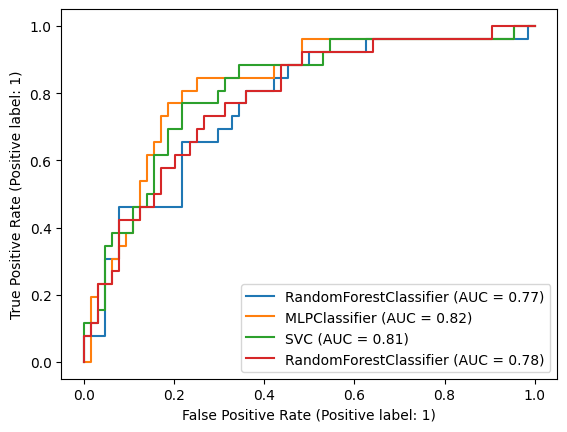

In [72]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
import warnings

# Create a plot for ROC curve

fig = plt.figure()
ax = fig.gca()

plot_roc_curve(RFC, X_test, y_test, ax=ax)
plot_roc_curve(mlp, X_test, y_test, ax=ax)
plot_roc_curve(svc, X_test, y_test, ax=ax)
plot_roc_curve(RFCu, X_test, y_test, ax=ax)

plt.show()
warnings.filterwarnings('ignore')

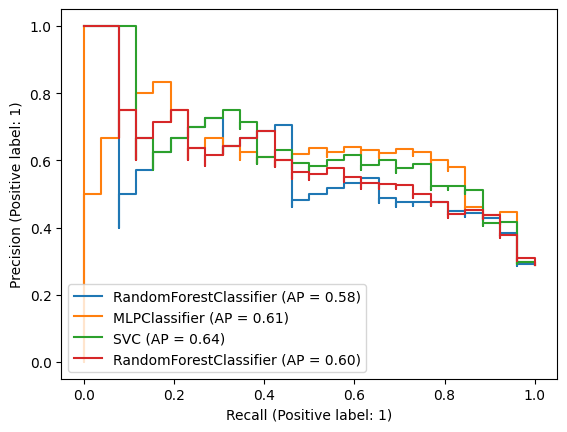

In [73]:
fig = plt.figure()
ax = fig.gca()

# Create a plot for PRC curve

plot_precision_recall_curve(RFC, X_test, y_test, ax=ax)
plot_precision_recall_curve(mlp, X_test, y_test, ax=ax)
plot_precision_recall_curve(svc, X_test, y_test, ax=ax)
plot_precision_recall_curve(RFCu, X_test, y_test, ax=ax)

plt.show()
warnings.filterwarnings('ignore')

While ROC curve shows that MLPClassifier has the most highest AUC score, SVC classifier's Precision recall curve's AP score is higher than MLPClassifier. 

Therefore, I will use permutation_importance to see how these two classifiers with the higest accuracy pioritize the factors. 

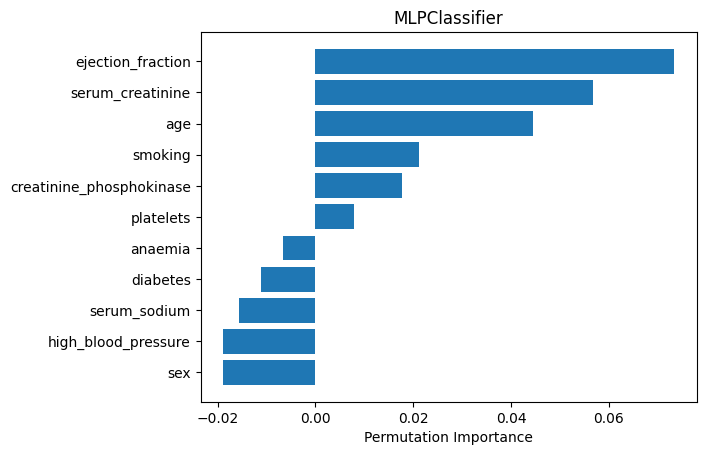

In [75]:
# Compute feature importances using permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=1, n_jobs=-1)

# Create a bar plot of feature importances


sorted_idx = result.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("MLPClassifier")
plt.show()

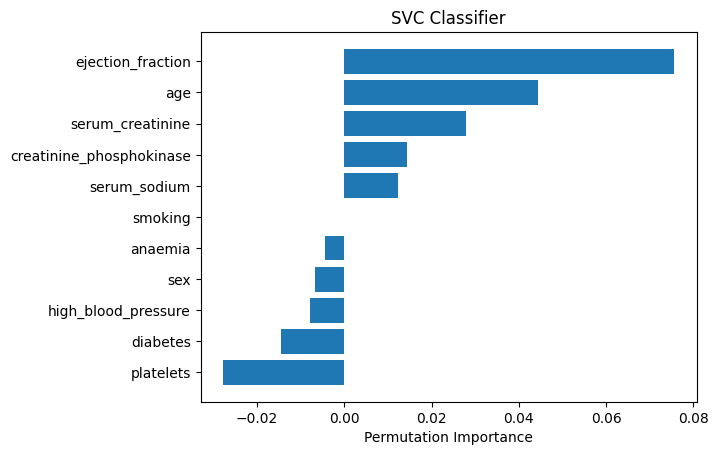

In [76]:


result = permutation_importance(svc, X_test, y_test, n_repeats=10, random_state=1, n_jobs=-1)

# Create a bar plot of feature importances

sorted_idx = result.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("SVC Classifier")
plt.show()

# Final Verdict 

Both the MLP and SVC classifiers ranked "ejection_fraction" as the leading cause of death from heart failure. However, the priorities of other factors are mixed between these two classifiers. While the MLP classifier saw 'serum_creatinine' as the second important factor, the SVC classifier saw 'age' as the second important factor.

Also, contrary to what I have concluded from previous analysis, smoking is positively important in both classifiers, and surprisingly, 'serum_sodium' is negatively important in the SVC classifier.

If I had to choose four important factors to balance the best result by looking at these two classifiers, then - ejection_fraction, age, serum_creatinine, and creatinine_phosphokinase - would be my choices.

But if I had to choose a single classifier to determine the result, then I would choose the MLP Classifier as it has the highest f1-score amongst all the other classifiers.

